In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
from datasets import load_dataset
data = pd.read_csv('https://lukeb.co/python_csv')
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

In [3]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month

df_DA_US_explode = df_DA_US.explode('job_skills')

In [4]:
df_pivot = df_DA_US_explode.pivot_table(index= 'job_posted_month', columns= 'job_skills', aggfunc= 'size', fill_value=0)
df_pivot.loc['total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending= False).index]
df_pivot = df_pivot.drop('total')

In [5]:
df_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,1,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,1,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,1,0,1,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df_total = df_DA_US.groupby('job_posted_month').size()

df_total

job_posted_month
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [7]:
df_plot = df_pivot.div(df_total/100, axis= 0)
df_plot.reset_index(inplace= True)
df_plot['job_month'] = df_plot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_plot = df_plot.set_index('job_month')
df_plot = df_plot.drop(columns ='job_posted_month')

df_plot = df_plot.iloc[:, :5]

In [8]:
df_plot

job_skills,sql,excel,tableau,python,power bi
job_month,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542
Feb,60.903427,42.367601,31.775701,29.439252,23.520249
Mar,58.883994,42.584435,33.994126,29.368576,20.337739
Apr,61.723886,42.147553,33.747261,30.752374,21.329438
May,61.072664,42.387543,31.747405,29.065744,21.712803
Jun,61.474731,40.679370,32.725766,32.808616,22.535211
Jul,58.638743,45.130890,30.994764,30.575916,19.895288
Aug,55.445545,45.332390,33.946252,32.531825,20.650636
Sep,56.658879,39.252336,32.359813,29.556075,21.378505


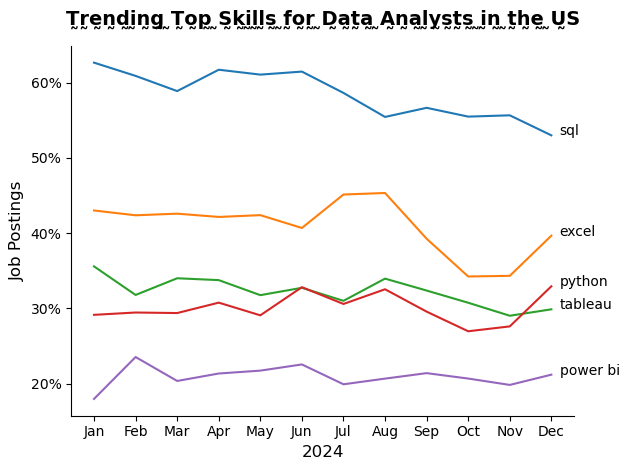

In [9]:
sns.lineplot(data= df_plot, dashes= False, palette='tab10', legend= False)
sns.despine()
plt.title('\u0330'.join('Trending Top Skills for Data Analysts in the US'), fontsize = 14, fontweight = 'bold', pad= 15)
plt.ylabel('Job Postings', fontsize = 12)
plt.xlabel('2024', fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i])
plt.tight_layout()
plt.show()